## SES 350 Final Project - Miriam Youssef, Victoria Froh
## 1:Analyzing NYC Covid-19 Data and Fitting an Exponential Curve to the Case Numbers Test the Output of No Social Distancing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nycdata = pd.read_csv('NYC data.csv')
nycdata
#reading in data file
# The data was shared with you through google drive, you should have recieved an email with the data just in case you 
# want to run the graphs yourself. 

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
0,3/2/2020,1,12.0,0
1,3/3/2020,4,10.0,0
2,3/4/2020,10,13.0,0
3,3/5/2020,2,17.0,0
4,3/6/2020,8,17.0,0
5,3/7/2020,14,9.0,0
6,3/8/2020,20,15.0,0
7,3/9/2020,54,36.0,0
8,3/10/2020,75,48.0,0
9,3/11/2020,157,72.0,1


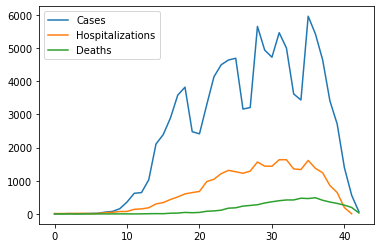

In [3]:
cases = nycdata['Cases'] #turning cases data into readable array
cases_fit = cases[:16] #chosing section to fit the curve to
hospital = nycdata['Hospitalizations']
deaths = nycdata['Deaths']
x = np.linspace(1,43,43) #creating an x array for the data plot
x_fit = np.linspace(1,16,16) #x array for the fitted section
n = nycdata.plot() #plot of full data

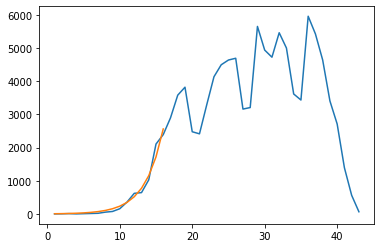

In [12]:
import scipy.optimize
def func(x_fit,a,b):
    return a*(b**x_fit) #exponential function to fit the curve to
popt,pcov = scipy.optimize.curve_fit(func,x_fit,cases_fit)
a_fit = popt[0] #a value
b_fit = popt[1] #b value
plt.plot(x,cases)
plt.plot(x_fit,func(x_fit,a_fit,b_fit))
plt.show()

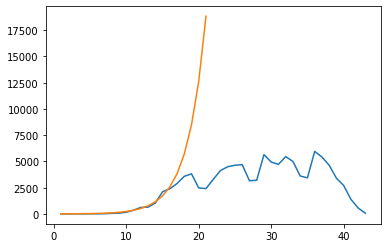

In [11]:
xx = np.linspace(1,21,21) #looking at fit on larger area of true data
y = a_fit*(b_fit**xx)
plt.plot(x,cases)
plt.plot(xx,func(xx,a_fit,b_fit))
plt.show()

It it clear from the projection of the early exponential fit that social distancing practices were implemented to decrease the cases numbers and flatten that curve. Without distancing, the cases would have kept skyrocketing exponentially.

## 2: Implementing the SEIR Differential Models of Covid-19 Analysis

In [7]:
def rhs(z,t,p):
    S,E,I,R = z #solution vector of state variables
    rep, tinc, tinf = p #parameter vector
    f = [((-rep/tinf)*I*S),(((rep/tinf)*I*S) - (E/tinf)),((E/tinc)-(I/tinf)),(I/tinf)]
    return f
 #f is a function of our three differentials

In [8]:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0 #reproduction number
tinc = 5.2 #incubation time
tinf = 2.9 #infection time
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]

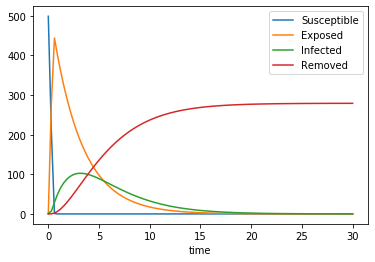

In [10]:
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

This is one example with initial parameters of a 3.0 reproduction rate per day, a 5.2 day incubation period and a 2.9 day infectious period, which were taken from Wuhan in the Kucharski et al paper. Although it mentions dividing by population in the first two differentials in the paper, that is because a number of other parameters wree involved in the paper with influx of population it does not work without those (which is why the website left that factor out, and we decided to follow it). 
Originally, the initial infectious number was set to 1 person, 0 were exposed, and the rest of the populartion was susceptible, the other 499. What happens if any of these conditions are changed?

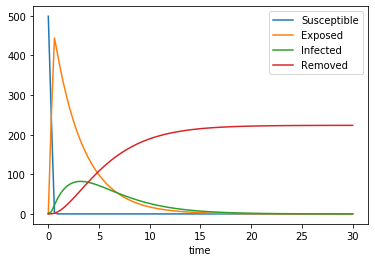

In [14]:
#Changing the incubation:
#raising the incubation time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 6.5
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

Raising the incubation period led to a drop in the height of the infected and removed curves, meaning the virus was more contained

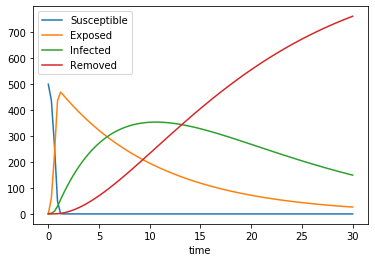

In [15]:
#Changing the infectious:
#raising the infectious time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 10.0
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

Raising the time of being infectious led to a much more gradual drop off in the number of exposed people, which dramatically increased the number of people who got infected (the green curve). Why the red has no asymptote is unknown.

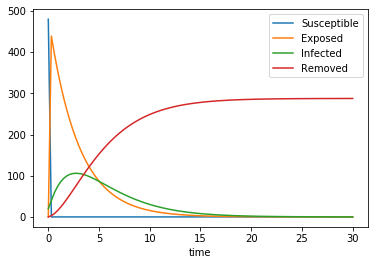

In [16]:
#Changing the number of intial infections:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 20
S0 = 480
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

Raising the number of initial infections seems to have no effect on the infected or removed curves

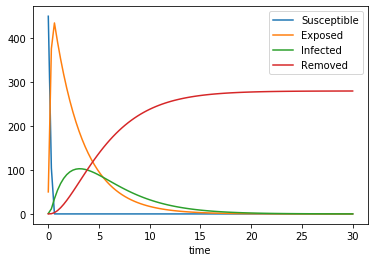

In [17]:
#raising the original exposed population
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 449
E0 = 50
R0 = 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

Raising the number of people initially exposed decreases the peak of the susceptible populatiom as well as the value when the removed curve stabilizes.

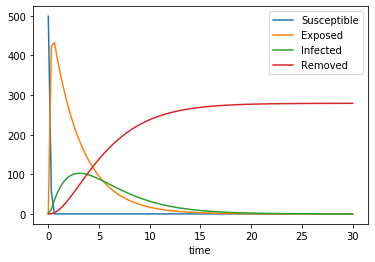

In [19]:
#increasing the reproduction number
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 5.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0 = 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')
plt.show()

Increasing the reproduction number, of how many people one person can effect, seemed only to affect the peak shape and value of the exposed population. 

## 3: Implementing the Toy Ball Simulation

The main question we are trying to answer in these simulations is if the stay-at-home order/quarantine is reducing the amount of people that get sick and if it also reduced the rate at which people get sick. 


This is a free for all simulation to show the rate and amount of people that get sick if we dont implement any quarantine/stay-at-home rules. It starts off with one infected person with the color red. The rest are blue which signifies that they are susceptible to catch the virus. Once the infected person hits the susceptible person, they change from the blue to the red. 14 seconds after the person is infected, they turn green signifying that they are recovered. The 14 seconds signify the 14 days it takes for a person to recover. When they turn green they can no longer get infected nor infect anyone. After all of the people get infected, a graph will be produced to show the amount of people that got sick and the rate at which they got sick. After they all get recovered, another graph will be produced to show the amount of people get recovered and the rate at which they get recovered. As the people get sick and recovered, there will be a real time output of the accumulated number of people sick/recovered.

The graphs you see will be from the simulation I ran, but feel free to run the simulation again. This may give different outputs than what I depicted as the speed of the circles are random. This means that the people may get sick faster or slower depending on what number it generates. Overall the total amount of time people get sick is usually around 15-25 seconds. This also may depend on the computer you are using. 

Note: To run these simulations you have to have pygame installed. If you dont, follow this link to install: https://cs.hofstra.edu/docs/pages/guides/InstallingPygame.html 
There will be a red box when you exit out of the simulation basically saying that you broke the loop and exitted. 


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Number of Infected: 
1
Number of Infected: 
2
Number of Infected: 
3
Number of Infected: 
4
Number of Infected: 
5
Number of Infected: 
6
Number of Infected: 
7
Number of Infected: 
8
Number of Infected: 
9
Number of Infected: 
10
Number of Infected: 
11
Number of Infected: 
12
Number of Infected: 
13
Number of Infected: 
14
Number of Infected: 
15
Number of Infected: 
16
Number of Infected: 
17
Number of Infected: 
18
Number of Infected: 
19
Number of Infected: 
20
Number of Infected: 
21
Number of Infected: 
22
Number of Infected: 
23
Number of Infected: 
24
Number of Infected: 
25
Number of Infected: 
26
Number of Infected: 
27
Number of Infected: 
28
Number of Infected: 
29
Number of Infected: 
30
Number of Infected: 
31
Number of Infected: 
32
Number of Infected: 
33
Number of Infected: 
34
Number of Infected: 
35
Number of Infected: 
36
Number of Infected: 
37
Number of Infected: 
38
Number of In

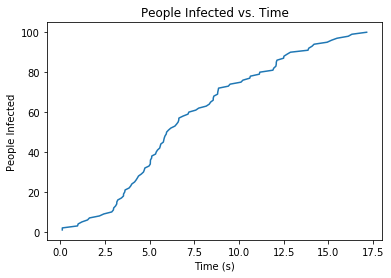

Number Recovered: 
15
Number Recovered: 
16
Number Recovered: 
17
Number Recovered: 
18
Number Recovered: 
19
Number Recovered: 
20
Number Recovered: 
21
Number Recovered: 
22
Number Recovered: 
23
Number Recovered: 
24
Number Recovered: 
25
Number Recovered: 
26
Number Recovered: 
27
Number Recovered: 
28
Number Recovered: 
29
Number Recovered: 
30
Number Recovered: 
31
Number Recovered: 
32
Number Recovered: 
33
Number Recovered: 
34
Number Recovered: 
35
Number Recovered: 
36
Number Recovered: 
37
Number Recovered: 
38
Number Recovered: 
39
Number Recovered: 
40
Number Recovered: 
41
Number Recovered: 
42
Number Recovered: 
43
Number Recovered: 
44
Number Recovered: 
45
Number Recovered: 
46
Number Recovered: 
47
Number Recovered: 
48
Number Recovered: 
49
Number Recovered: 
50
Number Recovered: 
51
Number Recovered: 
52
Number Recovered: 
53
Number Recovered: 
54
Number Recovered: 
55
Number Recovered: 
56
Number Recovered: 
57
Number Recovered: 
58
Number Recovered: 
59
Number Rec

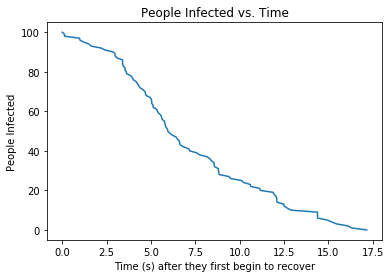

SystemExit: 

C:\Users\katko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [20]:
import math
import random
import sys
import time
import pygame
from pygame.locals import *
import matplotlib.pyplot as plt

# The circles in this simulation are people. I will be going back and forth between the words but they mean the same
# thing.

# import time
pygame.init()  # initailizing pygame for us to use
Surface = pygame.display.set_mode((800, 600))  # Setting the size of the screen that the simulation will show up

# Create Empty lists
circleHolder = []  # Creates the array to put the circles in. There are 101 circles in this array.
infectedNumber = 0  # Setting the initial infected number to 0. This will eventually be filled with the 100 people.
# Not the 101 because that last one is initally infected. We are looking at the people this person infects.
timeHolder1 = 0  # Setting the initial time to 0. This is to normalize the time on the graphs
recoveredNumber = 0  # Setting the initial recovered number to 0. This will be filled with the 101 people recovered
t0 = 0  # Setting the t0 (time) to be 0. It will take the time when the number of infected exceeds 2.
t1 = 0  # Setting the t1 (time) to be 0. When the amount of infected people are greater than 100, it will log the time.
q = 1  # Variable that we set to 0 for if loop later in the code. This is used with timeHolder1 to normalize the
# recovered graph
totalTime = 0  # Setting this to be 0. This will eventually be the time it takes for the people to fully get infected.
infectedList = []  # The people that get infected will be added to this list so we make a graph with the data
infectedtimeList = []  # This is the time thats associated with infected list. When an infected person enters the
# infectedList, a time will enter this list so we can plot them.
recoveredList = []  # The people that get recovered will be added to this list so we make a graph with the data
recoveredtimeList = []  # This is the time thats associated with recovred list. When an recovered person enters the
# recoveredList, a time will enter this list so we can plot them.
k2 = 0  # This is setting k2 to 0. This will be used below to normalize the infected graph.


def main():  # This is the main loop that allows the simulation to continually run
    while True:
        GetInput()  # Starting the loop off with going to the GetInput() definition
        Move()  # Once the GetInput() function is done it will then go to the move definition. This is allowing the
        # circles move based off their random speed and position.
        Draw()  # Once the Move() function is done, the Draw() will start the timer and change the colors of the
        # circles when they recover. This allows for the circles to turn green after 14 seconds of them being
        # infected. This is where the plots are graphed and where the setting for the background color and colors of
        # the susceptible and infected come from.
        CollisionDetect()  # Once the Draw() function is done, the CollisionDetect function will detect if they are
        # colliding with the wall or with themselves. If they collide with themselves, itll then go to the
        # CircleCollide() definition that does the math for what direction and speed it will go based off the initial
        # speed and direction of both of the circles ( or one if its colliding with the wall).


class Circle:
    def __init__(self, k=0):
        self.radius = 7  # Setting the radius of the circles to be 7
        self.x = random.randint(self.radius, 800 - (
                2 * self.radius + 20))  # Setting the x a random position to be within the screen width that
        # we've specified above
        self.y = random.randint(self.radius, 600 - (
                2 * self.radius + 20))  # Setting the y a random position to be within the screen length that
        # we've specified above
        self.speedx = 0.5 * (
                random.random() + 2)  # Setting the speed in the x direction to be random and faster as the
        # random.random() is between 0 and 1.
        self.speedy = 0.5 * (
                random.random() + 2)  # Setting the speed in the y direction to be random and faster as the
        # random.random() is between 0 and 1.
        self.Infected = False  # Setting that there are no infected people
        self.Susceptible = False  # Setting that there are no susceptible people
        self.Green = False  # Setting that there are no removed people (green)
        self.NewColor = False  # Setting nothing red
        self.InfectedTime = 0  # Starts the timer for when each circle becomes infected.
        self.IF = 0  # This is the same as the InfectedTime but a new variable so it doesnt effect the time at which
        # the people start to recover
        self.k2 = time.time()  # This is used to normalize the infected graph.

        if k == 1:
            self.Infected = True  # This is for the initial 1 circle thats infected. This is allowing us to call this
            # one infected
            self.InfectedTime = time.time()  # This is starting the timer once the one initial infected person goes
            # through this loop.
            self.IF = time.time()  # This is a second timer for the normalization of the graph. This starts the timer
            # so that we can start graphing the infected people
        else:
            self.Susceptible = True  # The rest of the population (100) will then go through this part of the loop
            # identifying it as a susceptible circle.


for x in range(1):
    circleHolder.append(Circle(
        1))  # This is allowing only one of the circles to be identified as 1 which will go through the loop above
    # and be identified as infected.
for x in range(100):
    circleHolder.append(Circle(
        0))  # This is allowing the rest of the circles to be identified as a 0 which will go through the loop above
    # and then be identified as susceptible.


def CircleCollide(c1, c2):
    global infectedNumber  # allows infectedNumber to be a global variable.

    C1Speed = math.sqrt((c1.speedx ** 2) + (c1.speedy ** 2))  # a^2+b^2 = c^2.
    XDiff = -(c1.x - c2.x)  # This is the difference between the x in both circles
    YDiff = -(c1.y - c2.y)  # This is the difference between the y in both circles

    if XDiff > 0:  # This is the math pertaining to the direction of the circles when they hit the wall or each other.
        if YDiff > 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff < 0:
        if YDiff > 0:
            Angle = 180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = -180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff == 0:
        if YDiff > 0:
            Angle = -90
        else:
            Angle = 90
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    elif YDiff == 0:
        if XDiff < 0:
            Angle = 0
        else:
            Angle = 180
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    else:
        print("hello")

    if (c1.Susceptible and c2.Infected) is True:  # This is when a susceptible circle 1 hits an infected circle 2.
        c1.NewColor = True  # This allows circle 1 to have the color red.
        c2.NewColor = True  # This allows circle 2 to have the color red.
        c1.Susceptible = False  # This allows the identity of the susceptible circle to be false.
        c1.Infected = True  # From the last line, we've stripped its old identity and now have it identified as
        # susceptible.
        infectedNumber = infectedNumber + 1  # This allows the number of infected people to increase by 1 each time
        # it loops.
        infectedList.append(infectedNumber)  # It is now being added to the list, infectedList
        print("Number of Infected: ")  # printing an intro to the number of people infected
        print(infectedNumber)  # Printing the number of people infected
        c1.InfectedTime = time.time()  # Starting a timer for when the person gets infected
        c1.IF = time.time() - c1.k2  # This is setting another timer but allowing it to start from 0 because if you
        # just started the timer it would take the time of the CPU. This allows it to log the time that the person
        # got infected.
        infectedtimeList.append(c1.IF)  # This is appending the time to the infectedtimeList.


    elif (c1.Infected and c2.Susceptible) is True:  # This is when a infected circle 1 hits an susceptible circle 2.
        c1.NewColor = True  # This allows circle 1 to have the color red.
        c2.NewColor = True  # This allows circle 2 to have the color red.
        c2.Susceptible = False  # This allows the identity of the susceptible circle to be false.
        c2.Infected = True  # From the last line, we've stripped its old identity and now have it identified as
        # susceptible.
        infectedNumber = infectedNumber + 1  # This allows the number of infected people to increase by 1 each time
        # it loops.
        infectedList.append(infectedNumber)  # It is now being added to the list, infectedList
        print("Number of Infected: ")  # printing an intro to the number of people infected
        print(infectedNumber)  # Printing the number of people infected
        c2.InfectedTime = time.time()  # Starting a timer for when the person gets infected
        c2.IF = time.time() - c2.k2  # This is setting another timer but allowing it to start from 0 because if you
        # just started the timer it would take the time of the CPU. This allows it to log the time that the person
        # got infected.
        infectedtimeList.append(c2.IF)  # This is appending the time to the infectedtimeList.

    c1.speedx = XSpeed  # From the speed calculated above, this is replacing the old definition for xspeed because it
    # has now collidied with the wall or another circle
    c1.speedy = YSpeed  # From the speed calculated above, this is replacing the old definition for yspeed because it
    # has now collidied with the wall or another circle
    pygame.display.flip()  # Updating the display of the simulation.


def Move():  # This is moving the circle to its new position and speed
    for Circle in circleHolder:
        Circle.x += Circle.speedx
        Circle.y += Circle.speedy


def CollisionDetect():
    # This is what happens when the circle hits wall
    for Circle in circleHolder:
        if Circle.x < Circle.radius or Circle.x > 800 - (2 * Circle.radius + 10):
            Circle.speedx *= -1  # When it hits is flips its direction
        if Circle.y < Circle.radius or Circle.y > 600 - (2 * Circle.radius + 10):
            Circle.speedy *= -1  # When it hits is flips its direction

    # This detects that there is a collision between two circles hitting each other
    for Circle in circleHolder:
        for Circle2 in circleHolder:
            if Circle != Circle2:
                if math.sqrt(((Circle.x - Circle2.x) ** 2) + ((Circle.y - Circle2.y) ** 2)) <= (
                        Circle.radius + Circle2.radius):
                    CircleCollide(Circle,
                                  Circle2)  # Once it detects that it hit another circle, it sends it to the
                    # CircleCollide() definition


def Draw():
    global t0  # Creating a global variable for t0
    global t1  # Creating a global variable for t1
    global totalTime  # Creating a global variable for totalTime
    global infectedNumber  # Creating a global variable for infectdNumber
    global recoveredNumber  # Creating a global variable for recoveredNumber
    global q  # Creating a global variable for q
    global k2  # Creating a global variable for k2
    global timeHolder1  # Creating a global variable for timeHolder1

    pygame.display.set_caption('WE RULE')

    if infectedNumber == 2:  # When the number of infected people is 2, take the time
        t0 = time.time()

    if infectedNumber == 100:
        t1 = time.time()  # When the number of infected people is 100 take the time again.
        totalTime = t1 - t0  # To get the total time from the second person getting infected to the last. Second
        # becasue the first one is what gets everyone sick.
        print(totalTime)
        infectedNumber = 101  # This changes the number associated with the infectedNumber so that it wouldnt run
        # through the loop again.
        plt.plot(infectedtimeList, infectedList)  # This is plotting the infected people vs time.
        plt.xlabel("Time (s)")  # x axis label
        plt.ylabel("People Infected")  # y axid label
        plt.title("People Infected vs. Time")  # Title
        plt.show()

    for Circle in circleHolder:
        if Circle.InfectedTime > 0 and Circle.Green == False:  # If the infectedtime is above 0 and if that one
            # circle is not removed (Green), the go through the loop.
            timeHolder = (
                    time.time() - Circle.InfectedTime)  # The timeholder now is starting from zero and takes the time
            # of each of the circles that run through the code.
            if 14 <= timeHolder:  # If the timeholder is above 14 seconds, run through this loop.
                if q == 1:  # q is initially starting at 1 from the above statement. Once it goes through it once
                    # itll start the timer then no longer be able to loop because we changed q to equal 2.
                    timeHolder1 = time.time()
                    q = 2
                Circle.Green = True  # Makes the circle have a removed color (green)
                Circle.Infected = False  # Makes the identity no longer infected
                Circle.NewColor = False  # Makes the color longer blue.
                recoveredNumber = recoveredNumber + 1  # This allows the number of recovered people to increase by 1
                # each time it loops.
                print("Number Recovered: ")  # Prints the number of recovered people
                print(recoveredNumber)

                rN = 101 - recoveredNumber  # The list that subtracts from the 101 total people to show the "fall"
                # curve of the people getting recovered.
                recoveredList.append(rN)  # This is appending rN to the list recoveredList.
                t2 = time.time()  # This is the time the people first start recovering
                t3 = t2 - timeHolder1  # This is the time from 0 that the people start recovering.
                recoveredtimeList.append(t3)  # Appendint the t3 to the list of recoveredtimeList().

        if recoveredNumber == 101:  # This loop only starts when the number of recovered people is 101
            plt.plot(recoveredtimeList, recoveredList)  # This is plotting the recovered people vs time
            plt.xlabel("Time (s) after they first begin to recover")  # x label
            plt.ylabel("People Infected")  # y label
            plt.title("People Infected vs. Time")  # title
            plt.show()
            recoveredNumber = 100  # changing the number of recovered people there are so that it doent run through
            # the loop again.

    Surface.fill((255, 255, 255))  # This allows for the background of the simulation to be white.
    for Circle in circleHolder:
        if Circle.NewColor:  # This is changing the circles to red
            pygame.draw.circle(Surface, (255, 0, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
        elif Circle.Green:  # This is changing the circles to the color green
            pygame.draw.circle(Surface, (0, 255, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
        else:  # This is changing the circles to the color blue
            pygame.draw.circle(Surface, (0, 0, 255), (int(Circle.x), int(600 - Circle.y)), Circle.radius)

    pygame.display.flip()  # THis is updating the simulation.


def GetInput():  # This is allowing you to hit escape when the simulation is playing to exit the simulation.
    keystate = pygame.key.get_pressed()
    for event in pygame.event.get():
        if event.type == QUIT or keystate[K_ESCAPE]:
            pygame.quit();
            sys.exit()


if __name__ == '__main__': main()


There are two plots in the output. The first one is depicting the people infected vs. time. This is showing that all 101 people get infected in about 17.5 seconds. Its an exponential curve that is similar to the plots we made from the differential equations.

This next simulation shows that about 75% of the population is quarantining and the remaining are roaming freely. The only difference between this and the last graph is the people that remain in their position and the fact that not all of the people will get sick. When the people that get sick are recovered, two graphs will be produced to show the amount of people that got sick and the rate at which they got sick. As the people get sick and recovered, there will be a real time output of the accumulated number of people sick/recovered.

The graphs you see will be from the simulation I ran, but feel free to run the simulation again. This may give different outputs than what I depicted as the speed of the circles are random. This means that the people may get sick faster or slower depending on what number it generates. Overall, the total amount of time the people usually get sick is between 50-80 seconds. This also may depend on the computer you are using. 

There will be a red box when you exit out of the simulation basically saying that you broke the loop and exitted. 

Number of Infected: 
1
Number of Infected: 
2
Number of Infected: 
3
Number of Infected: 
4
Number of Infected: 
5
Number of Infected: 
6
Number of Infected: 
7
Number of Infected: 
8
Number of Infected: 
9
Number of Infected: 
10
Number of Infected: 
11
Number of Infected: 
12
Number of Infected: 
13
Number of Infected: 
14
Number of Infected: 
15
Number Recovered: 
1
Number of Infected: 
16
Number of Infected: 
17
Number Recovered: 
2
Number of Infected: 
18
Number of Infected: 
19
Number of Infected: 
20
Number of Infected: 
21
Number of Infected: 
22
Number of Infected: 
23
Number of Infected: 
24
Number of Infected: 
25
Number of Infected: 
26
Number of Infected: 
27
Number of Infected: 
28
Number of Infected: 
29
Number Recovered: 
3
Number of Infected: 
30
Number Recovered: 
4
Number of Infected: 
31
Number Recovered: 
5
Number of Infected: 
32
Number of Infected: 
33
Number of Infected: 
34
Number of Infected: 
35
Number Recovered: 
6
Number Recovered: 
7
Number of Infected: 
3

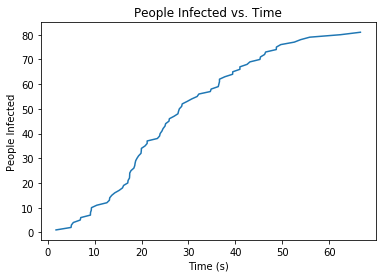

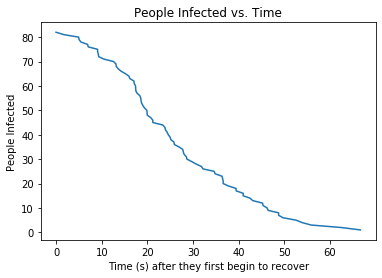

SystemExit: 

C:\Users\katko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [21]:
import math
import random
import sys
import time
import pygame
from pygame.locals import *
import matplotlib.pyplot as plt

# The circles in this simulation are people. I will be going back and forth between the words but they mean the same
# thing.
 
 
pygame.init()  # initailizing pygame for us to use
Surface = pygame.display.set_mode((800, 600))  # Setting the size of the screen that the simulation will show up
 
# Create Empty lists
circleHolder = []  # Creates the array to put the circles in. There are 101 circles in this array.
infectedNumber = 0  # Setting the initial infected number to 0. This will eventually be filled with the 100 people.
# Not the 101 because that last one is initally infected. We are looking at the people this person infects.
timeHolder1 = 0  # Setting the initial time to 0. This is to normalize the time on the graphs
recoveredNumber = 0  # Setting the initial recovered number to 0. This will be filled with the 101 people recovered
t0 = 0  # Setting the t0 (time) to be 0. It will take the time when the number of infected exceeds 2.
t1 = 0  # Setting the t1 (time) to be 0. When the amount of infected people are greater than 100, it will log the time.
q = 1  # Variable that we set to 0 for if loop later in the code. This is used with timeHolder1 to normalize the
# recovered graph
totalTime = 0  # Setting this to be 0. This will eventually be the time it takes for the people to fully get infected.
infectedList = []  # The people that get infected will be added to this list so we make a graph with the data
infectedtimeList = []  # This is the time thats associated with infected list. When an infected person enters the
# infectedList, a time will enter this list so we can plot them.
recoveredList = []  # The people that get recovered will be added to this list so we make a graph with the data
recoveredtimeList = []  # This is the time that's associated with recovered list. When an recovered person enters the
# recoveredList, a time will enter this list so we can plot them.
k2 = 0  # This is setting k2 to 0. This will be used below to normalize the infected graph.
g = 1 # This is setting g to 0 allowing us to exit out of a loop below


def main():  # This is the main loop that allows the simulation to continually run
    while True:
        GetInput()
        # Starting the loop off with going to the GetInput() definition
        Move()
        # Once the GetInput() function is done it will then go to the move definition. This is allowing the
        # circles move based off their random speed and position.
        Draw()
        # Once the Move() function is done, the Draw() will start the timer and change the colors of the
        # circles when they recover. This allows for the circles to turn green after 14 seconds of them being
        # infected. This is where the plots are graphed and where the setting for the background color and colors of
        # the susceptible and infected come from.
        CollisionDetect()
        # Once the Draw() function is done, the CollisionDetect function will detect if they are
        # colliding with the wall or with themselves. If they collide with themselves, itll then go to the
        # CircleCollide() definition that does the math for what direction and speed it will go based off the initial
        # speed and direction of both of the circles ( or one if its colliding with the wall).


class Circle:
    def __init__(self, k=0):

        self.radius = 7  # Setting the radius of the circles to be 7
        self.x = random.randint(self.radius, 800 - (2 * self.radius + 20))
        # Setting the x a random position to be within the screen width that we've specified above
        self.y = random.randint(self.radius, 600 - (2 * self.radius + 20))
        # Setting the y a random position to be within the screen length that we've specified above
        self.speedx = 0  # Setting the speed in the x direction to be 0.
        self.speedy = 0  # Setting the speed in the y direction to be 0.
        self.Infected = False  # Setting that there are no infected people
        self.Susceptible = False  # Setting that there are no susceptible people
        self.Green = False  # Setting that there are no removed people (green)
        self.NewColor = False  # Setting nothing red
        self.InfectedTime = 0  # Starts the timer for when each circle becomes infected.
        self.IF = 0  # This is the same as the InfectedTime but a new variable so it doesnt effect the time at which
        # the people start to recover
        self.k2 = time.time()  # This is used to normalize the infected graph.

        if k == 1:
            self.speedy = 0.5 * (random.random() + 2) # This is allowing the one infected initial ball to have a speed
            # in the y direction
            self.speedx = 0.5 * (random.random() + 2) # This is allowing the one infected initial ball to have a speed
            # in the x direction
            self.isolate = False # This is allowing the infected person to move freely
            self.Infected = True  # This is for the initial 1 circle thats infected. This is allowing us to call this
            # one infected
            self.InfectedTime = time.time()  # This is starting the timer once the one initial infected person goes
            # through this loop.
            self.IF = time.time()  # This is a second timer for the normalization of the graph. This starts the timer
            # so that we can start graphing the infected people
        elif k == 2: # For the the 75 people (3/4 of the population) that are staying home, we have time identify as 
        # isolate and suscepticle
            self.isolate = True
            self.Susceptible = True
        else:
            self.speedy = 0.5 * (random.random() + 2) # This is allowing the one infected initial ball to have a speed
            # in the y direction
            self.speedx = 0.5 * (random.random() + 2) # This is allowing the one infected initial ball to have a speed
            # in the x direction
            self.isolate = False # This is allowing them to move freely
            self.Susceptible = True  # The rest of the population (100) will then go through this part of the loop
            # identifying it as a susceptible circle.


for x in range(75):
    circleHolder.append(Circle(2)) # This is identifying the circles as 2 so they can go through the loop above
    # and become isolated. 

for x in range(1):
    circleHolder.append(Circle(1))
    # This is allowing only one of the circles to be identified as 1 which will go through the loop above
    # and be identified as infected.
for x in range(25):
    circleHolder.append(Circle(0))
    # This is allowing the rest of the circles to be identified as a 0 which will go through the loop above
    # and then be identified as susceptible.
totalPeople = 101 # Setting the total amount of people to 101


def CircleCollide(c1, c2):
    global infectedNumber  # allows infectedNumber to be a global variable.

    C1Speed = math.sqrt((c1.speedx ** 2) + (c1.speedy ** 2))  # a^2+b^2 = c^2.
    XDiff = -(c1.x - c2.x)  # This is the difference between the x in both circles
    YDiff = -(c1.y - c2.y)  # This is the difference between the y in both circles

    if XDiff > 0:  # This is the math pertaining to the direction of the circles when they hit the wall or each other.
        if YDiff > 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff < 0:
        if YDiff > 0:
            Angle = 180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = -180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff == 0:
        if YDiff > 0:
            Angle = -90
        else:
            Angle = 90
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    elif YDiff == 0:
        if XDiff < 0:
            Angle = 0
        else:
            Angle = 180
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    else:
        print("hello")

    if (c1.Susceptible and c2.Infected) is True:  # This is when a susceptible circle 1 hits an infected circle 2.
        c1.NewColor = True  # This allows circle 1 to have the color red.
        c2.NewColor = True  # This allows circle 2 to have the color red.
        c1.Susceptible = False  # This allows the identity of the susceptible circle to be false.
        c1.Infected = True  # From the last line, we've stripped its old identity and now have it identified as
        # susceptible.
        infectedNumber = infectedNumber + 1  # This allows the number of infected people to increase by 1 each time
        # it loops.
        infectedList.append(infectedNumber)  # It is now being added to the list, infectedList
        print("Number of Infected: ")  # printing an intro to the number of people infected
        print(infectedNumber)  # Printing the number of people infected
        c1.InfectedTime = time.time()  # Starting a timer for when the person gets infected
        c1.IF = time.time() - c1.k2  # This is setting another timer but allowing it to start from 0 because if you
        # just started the timer it would take the time of the CPU. This allows it to log the time that the person
        # got infected.
        infectedtimeList.append(c1.IF)  # This is appending the time to the infectedtimeList.


    elif (c1.Infected and c2.Susceptible) is True:  # This is when a infected circle 1 hits an susceptible circle 2.
        c1.NewColor = True  # This allows circle 1 to have the color red.
        c2.NewColor = True  # This allows circle 2 to have the color red.
        c2.Susceptible = False  # This allows the identity of the susceptible circle to be false.
        c2.Infected = True  # From the last line, we've stripped its old identity and now have it identified as
        # susceptible.
        infectedNumber = infectedNumber + 1  # This allows the number of infected people to increase by 1 each time
        # it loops.
        infectedList.append(infectedNumber)  # It is now being added to the list, infectedList
        print("Number of Infected: ")  # printing an intro to the number of people infected
        print(infectedNumber)  # Printing the number of people infected
        c2.InfectedTime = time.time()  # Starting a timer for when the person gets infected
        c2.IF = time.time() - c2.k2  # This is setting another timer but allowing it to start from 0 because if you
        # just started the timer it would take the time of the CPU. This allows it to log the time that the person
        # got infected.
        infectedtimeList.append(c2.IF)  # This is appending the time to the infectedtimeList.

    c1.speedx = XSpeed  # From the speed calculated above, this is replacing the old definition for xspeed because it
    # has now collidied with the wall or another circle
    c1.speedy = YSpeed  # From the speed calculated above, this is replacing the old definition for yspeed because it
    # has now collidied with the wall or another circle
    pygame.display.flip()  # Updating the display of the simulation.


def Move():  # This is moving the circle to its new position and speed
    for Circle in circleHolder:
        if not Circle.isolate:
            Circle.x += Circle.speedx
            Circle.y += Circle.speedy


def CollisionDetect():
    # This is what happens when the circle hits wall
    for Circle in circleHolder:
        if Circle.x < Circle.radius or Circle.x > 800 - (2 * Circle.radius + 10):
            Circle.speedx *= -1  # When it hits is flips its direction
        if Circle.y < Circle.radius or Circle.y > 600 - (2 * Circle.radius + 10):
            Circle.speedy *= -1  # When it hits is flips its direction

    # This detects that there is a collision between two circles hitting each other
    for Circle in circleHolder:
        for Circle2 in circleHolder:
            if Circle != Circle2:
                if math.sqrt(((Circle.x - Circle2.x) ** 2) + ((Circle.y - Circle2.y) ** 2)) <= (
                        Circle.radius + Circle2.radius):
                    if Circle.isolate:
                        CircleCollide(Circle2, Circle)
                    elif Circle2.isolate:
                        CircleCollide(Circle, Circle2)
                    else:
                        CircleCollide(Circle, Circle2)
                    # This allows for only the people that can move, to go to circleCollide 


def Draw():
    global t0  # Creating a global variable for t0
    global recoveredSum # creating a global variable for recoveredSum
    global t1  # Creating a global variable for t1
    global totalTime  # Creating a global variable for totalTime
    global infectedNumber  # Creating a global variable for infectdNumber
    global recoveredNumber  # Creating a global variable for recoveredNumber
    global q  # Creating a global variable for q
    global k2  # Creating a global variable for k2
    global timeHolder1  # Creating a global variable for timeHolder1
    global g
    global totalPeople

    pygame.display.set_caption('WE RULE')

    if infectedNumber == 2:  # When the number of infected people is 2, take the time
        t0 = time.time()

    for Circle in circleHolder:
        if g == 1: # This allows tje code to run through only once 
            infectedSum = sum(1 for Circle in circleHolder if Circle.Infected == True) 
            #This gets the sum of the elements in the list 
            if infectedSum == 0:
                t1 = time.time()  # When the number of infected people is 100 take the time again.
                totalTime = t1 - t0  # To get the total time from the second person getting infected to the last. Second
                # becasue the first one is what gets everyone sick.
                print(totalTime)
                infectedNumber = 1  # This changes the number associated with the infectedNumber so that it wouldnt run
                # through the loop again.
                plt.plot(infectedtimeList, infectedList)  # This is plotting the infected people vs time.
                plt.xlabel("Time (s)")  # x axis label
                plt.ylabel("People Infected")  # y axid label
                plt.title("People Infected vs. Time")  # Title
                plt.show()
                g = 0 # Changes what g is so that it doesnt run through the loop again

    for Circle in circleHolder:
        if Circle.InfectedTime > 0 and Circle.Green == False:  # If the infectedtime is above 0 and if that one
            # circle is not removed (Green), the go through the loop.
            timeHolder = (
                    time.time() - Circle.InfectedTime)  # The timeholder now is starting from zero and takes the time
            # of each of the circles that run through the code.
            if 14 <= timeHolder:  # If the timeholder is above 14 seconds, run through this loop.
                if q == 1:  # q is initially starting at 1 from the above statement. Once it goes through it once
                    # itll start the timer then no longer be able to loop because we changed q to equal 2.
                    timeHolder1 = time.time()
                    q = 2
                Circle.Green = True  # Makes the circle have a removed color (green)
                Circle.Infected = False  # Makes the identity no longer infected
                Circle.NewColor = False  # Makes the color longer blue.
                recoveredNumber = recoveredNumber + 1  # This allows the number of recovered people to increase by 1
                # each time it loops.
                print("Number Recovered: ")  # Prints the number of recovered people
                print(recoveredNumber)

                rN = recoveredNumber  # The list that subtracts from the 101 total people to show the "fall"
                # curve of the people getting recovered.
                recoveredList.append(rN)  # This is appending rN to the list recoveredList.
                t2 = time.time()  # This is the time the people first start recovering
                t3 = t2 - timeHolder1  # This is the time from 0 that the people start recovering.
                recoveredtimeList.append(t3)  # Appendint the t3 to the list of recoveredtimeList().

        if g == 0: # If g = 0 like it does above, then itll run through the loop plotting the data
            recoveredSum = sum(1 for Circle in circleHolder if Circle.Green == True)
            notInfected = sum(1 for Circle in circleHolder if Circle.Susceptible == True)

            if (recoveredSum + notInfected) == totalPeople:
                recoveredList.reverse() # reverses the list so that its going down rather than up. 
                plt.plot(recoveredtimeList, recoveredList)  # This is plotting the recovered people vs time
                plt.xlabel("Time (s) after they first begin to recover")  # x label
                plt.ylabel("People Infected")  # y label
                plt.title("People Infected vs. Time")  # title
                plt.show()
                # changing the number of recovered people there are so that it doent run through
                # the loop again.
                g = 2

    Surface.fill((255, 255, 255))  # This allows for the background of the simulation to be white.
    for Circle in circleHolder:
        if Circle.NewColor:  # This is changing the circles to red
            pygame.draw.circle(Surface, (255, 0, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
        elif Circle.Green:  # This is changing the circles to the color green
            pygame.draw.circle(Surface, (0, 255, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
        else:  # This is changing the circles to the color blue
            pygame.draw.circle(Surface, (0, 0, 255), (int(Circle.x), int(600 - Circle.y)), Circle.radius)

    pygame.display.flip()  # THis is updating the simulation.


def GetInput():  # This is allowing you to hit escape when the simulation is playing to exit the simulation.
    keystate = pygame.key.get_pressed()
    for event in pygame.event.get():
        if event.type == QUIT or keystate[K_ESCAPE]:
            pygame.quit();
            sys.exit()


if __name__ == '__main__': main()


As you can see from the two graphs that were ouputted, only 82 of the 101 people get infected and the amount of time it took for those people to get sick was about 60 seconds. The remaining 19 people that didnt get sick were the ones that were staying home. All of the people that roamed freely got sick and they eventually infected 56 of the people that stayed home. Overall the simulation that had people staying home took 3.42 times longer for the people to get sick. This answers our question that the stay-at-home method to prevent the spread of the virus does reduce the amount of people sick and the rate at which they get sick. 